# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
iris_data=pd.read_csv("iris.csv")
print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


# Label Encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()

iris_data['Species']=label_encoder.fit_transform(iris_data['Species'])

print(iris_data.head())

   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [4]:
# Converting to numpy array
np_iris=iris_data.to_numpy()
print(np_iris.shape)

(150, 5)


# Getting Features and Target values

In [5]:
X_data=np_iris[:,0:4]
Y_data=np_iris[:,4]

print("Features :")
print(X_data[:5,:])

print("Target:")
print(Y_data[:5])

Features :
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Target:
[0. 0. 0. 0. 0.]


# Standardize the Dataset

In [6]:
scaler=StandardScaler().fit(X_data)

X_data=scaler.transform(X_data)

Y_data=tf.keras.utils.to_categorical(Y_data,3)

print("Features after Scaling:")
print(X_data[:5,:])

print("target after one-hot encoding:")
print(Y_data[:5])

Features after Scaling:
[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]
target after one-hot encoding:
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# Split train and test sets

In [7]:
X_train, X_test, Y_train, Y_test=train_test_split(X_data, Y_data, test_size=0.10)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(135, 4) (15, 4) (135, 3) (15, 3)


# Creating and compiling model

In [8]:
from tensorflow import keras

CLASSES=3

# Sequential model
model=tf.keras.models.Sequential()

# Hidden Layers
model.add(keras.layers.Dense(128, input_shape=(4,), name="Hidden-Layer-1", activation="relu"))
model.add(keras.layers.Dense(128, name="Hidden-Layer-2", activation="relu"))
# Softmax
model.add(keras.layers.Dense(CLASSES, name="Output-Layer", activation="softmax"))

# compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Hidden-Layer-1 (Dense)      (None, 128)               640       
                                                                 
 Hidden-Layer-2 (Dense)      (None, 128)               16512     
                                                                 
 Output-Layer (Dense)        (None, 3)                 387       
                                                                 
Total params: 17,539
Trainable params: 17,539
Non-trainable params: 0
_________________________________________________________________


# Training the model

In [9]:
VERBOSE=1
BATCH_SIZE=16
EPOCHS=20
VALIDATION_SPLIT=0.2

history=model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Epoch 1/20
7/7 [==============================] - 1s 47ms/step - loss: 0.8489 - accuracy: 0.8148 - val_loss: 0.6447 - val_accuracy: 0.7778
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5467 - accuracy: 0.8704 - val_loss: 0.5409 - val_accuracy: 0.7037
Epoch 3/20
7/7 [==============================] - 0s 8ms/step - loss: 0.4169 - accuracy: 0.8796 - val_loss: 0.5017 - val_accuracy: 0.6667
Epoch 4/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3415 - accuracy: 0.8889 - val_loss: 0.4748 - val_accuracy: 0.7037
Epoch 5/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2935 - accuracy: 0.8981 - val_loss: 0.4665 - val_accuracy: 0.7037
Epoch 6/20
7/7 [==============================] - 0s 8ms/step - loss: 0.2568 - accuracy: 0.8981 - val_loss: 0.4530 - val_accuracy: 0.7037
Epoch 7/20
7/7 [==============================] - 0s 10ms/step - loss: 0.2318 - accuracy: 0.9167 - val_loss: 0.4494 - val_accuracy: 0.7407
Epoch 8/20
7/7 [==============

# Accuracy plot

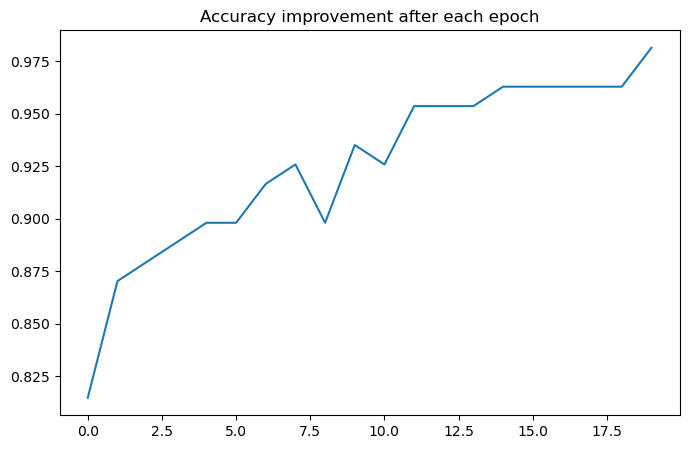

In [11]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history)["accuracy"].plot(figsize=(8,5))
plt.title("Accuracy improvement after each epoch")
plt.show()

# Evaluate the model

In [12]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 31ms/step - loss: 0.0500 - accuracy: 1.0000


[0.050019409507513046, 1.0]

# Predicting on custom input

In [15]:
pred_input=[[2.6,12.,2.4,4.4]]
scaled_input=scaler.transform(pred_input)

raw_pred=model.predict(scaled_input)
print("Raw Prediction Output (Probabilities):",raw_pred)

prediction=np.argmax(raw_pred)
print("Prediction is",label_encoder.inverse_transform([prediction]))

1/1 [==============================] - 0s 16ms/step
Raw Prediction Output (Probabilities): [[1.000000e+00 7.685326e-18 6.722452e-22]]
Prediction is ['setosa']
